In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import DistanceMetric
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#import csv
input_file  = open('patients.csv','r')  #read mode
df = pd.read_csv(input_file, sep=",")

In [3]:
#get dummies for categorical columns
dummies = pd.get_dummies(df[['Gender','Location','SelfAssessedHealthStatus']], drop_first=True)
#adding dummy columns to our dataframe
cleaned_df = pd.concat([df,dummies], axis=1)
#dropping columns in dataframe that are used for dummy columns since they are not wanted anymore
cleaned_df.drop(['Gender','Location','SelfAssessedHealthStatus'], axis=1, inplace=True)

#X and y values
X = cleaned_df[['Age',"Gender_'Male'",'Height','Weight','Smoker'
                    ,"Location_'St. Mary's Medical Center'"
                    ,"Location_'VA Hospital'"
                    ,"SelfAssessedHealthStatus_'Fair'"
                    ,"SelfAssessedHealthStatus_'Good'"
                    ,"SelfAssessedHealthStatus_'Poor'"]]
y = cleaned_df[["Systolic"]]

#rename columns so its easier to use later on
cleaned_df = cleaned_df.rename(columns={"Gender_'Male'": "Gender_Male",
        "Location_'St. Mary's Medical Center'": "Location_StMarysMedicalCenter",
        "Location_'VA Hospital'" : "Location_VAHospital",
        "SelfAssessedHealthStatus_'Fair'": "SelfAssessedHealthStatus_Fair",
        "SelfAssessedHealthStatus_'Good'": "SelfAssessedHealthStatus_Good",
        "SelfAssessedHealthStatus_'Poor'": "SelfAssessedHealthStatus_Poor"
        })



In [4]:
#concating all the column names together
model_columns ="Systolic ~ Age + Gender_Male +  Height + Weight + "
model_columns += "Location_StMarysMedicalCenter + Location_VAHospital + "
model_columns += "SelfAssessedHealthStatus_Fair + SelfAssessedHealthStatus_Good + SelfAssessedHealthStatus_Poor"



In [5]:
model1 = ols(model_columns, data=cleaned_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Systolic   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.508
Date:                Mon, 11 Jun 2018   Prob (F-statistic):              0.157
Time:                        11:52:06   Log-Likelihood:                -324.77
No. Observations:                 100   AIC:                             669.5
Df Residuals:                      90   BIC:                             695.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

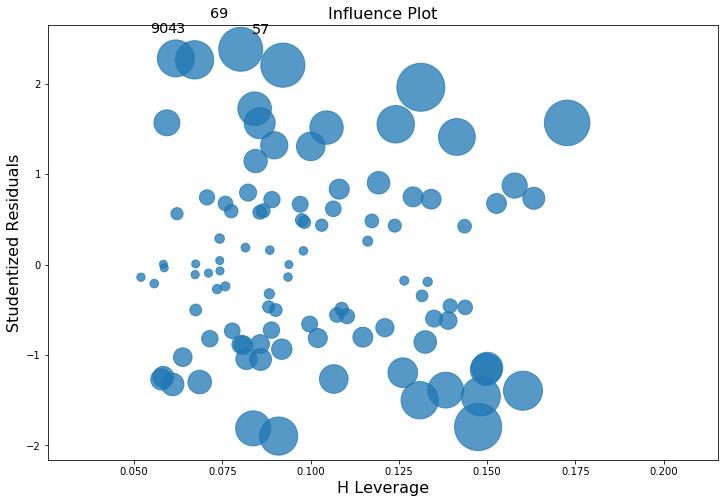

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")
fig

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
